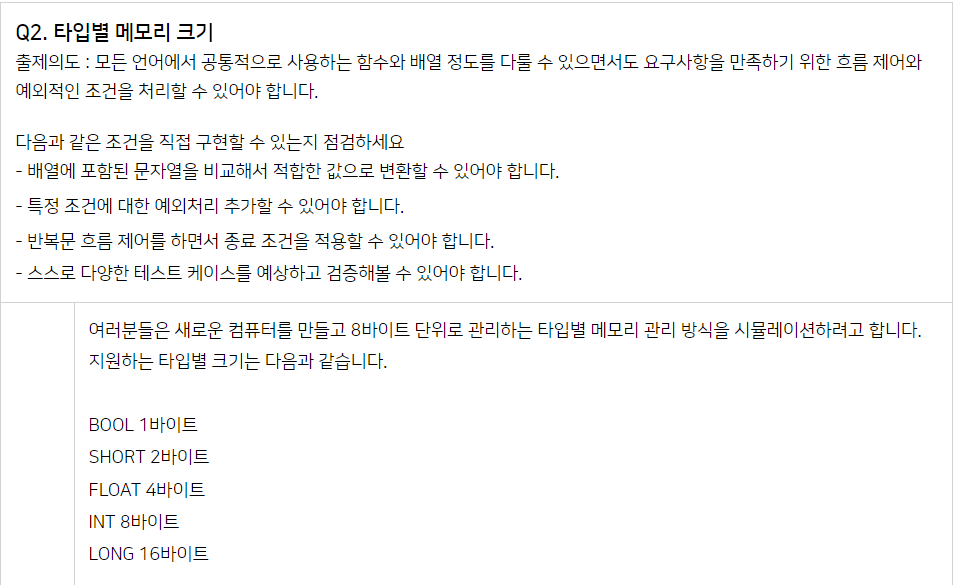
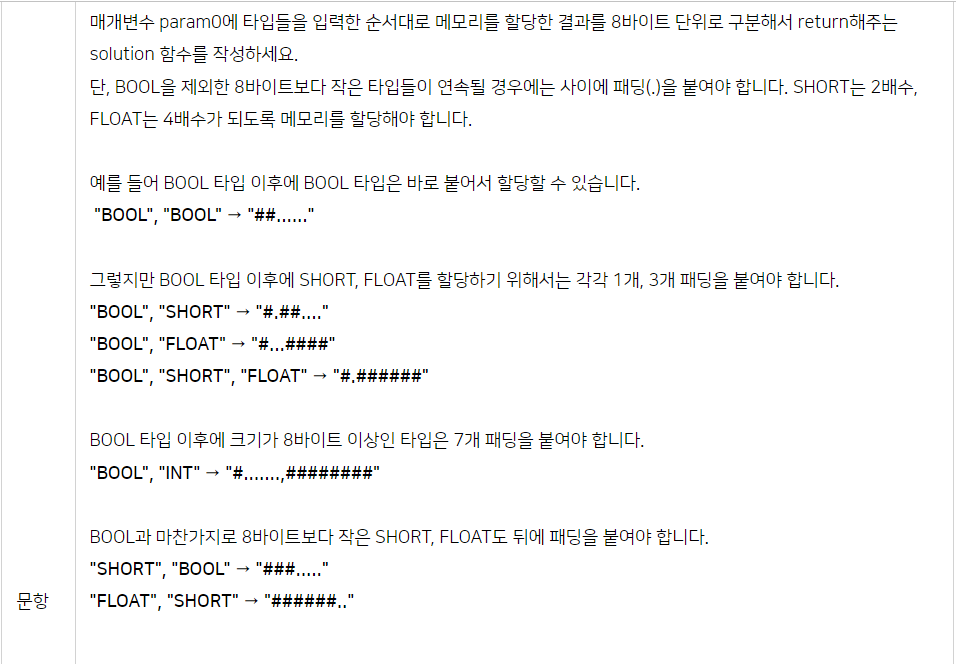
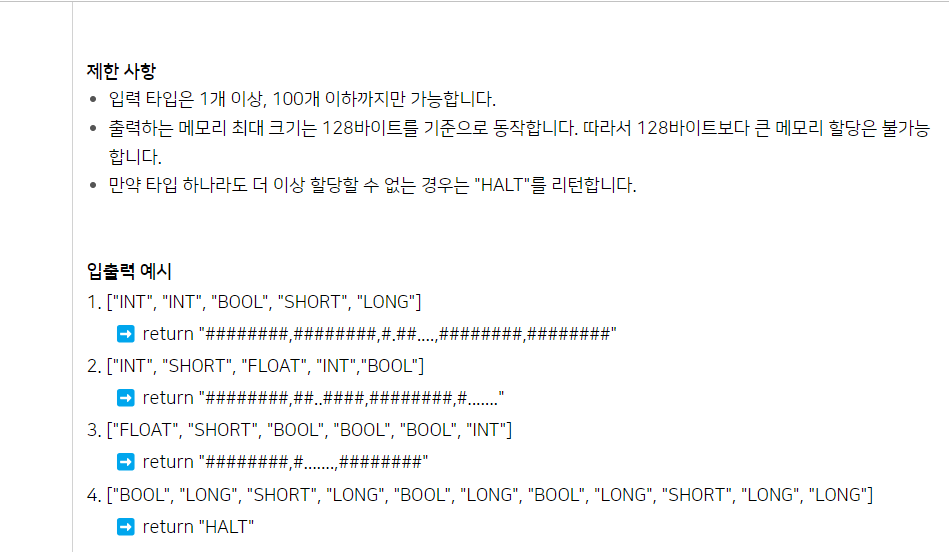
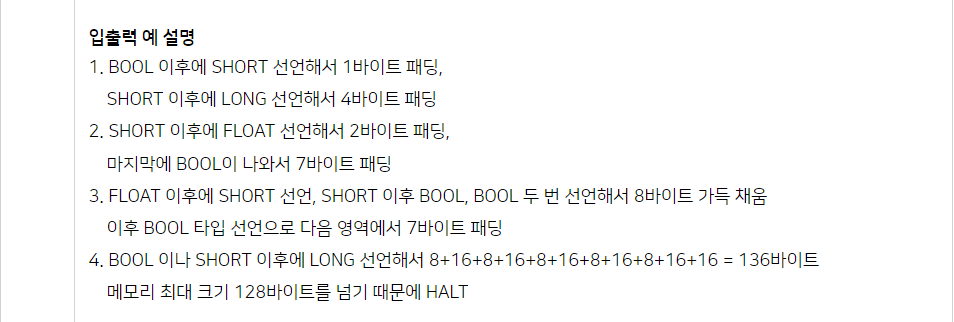


In [1]:
BOOL = "#"  # 1바이트
SHORT = "##" # 2바이트
FLOAT = "####" # 4바이트
INT = "########" # 8바이트
LONG = "################" # 16바이트

def returnStr(element):
    if element == "BOOL":
        return BOOL
    elif element == "SHORT":
        return SHORT
    elif element == "FLOAT":
        return FLOAT
    elif element == "INT":
        return INT
    elif element == "LONG":
        return LONG
    else:
        raise TypeError("not valid type")

def addPadding(str, totalByte, currentByte):
    # BOOL 경우 padding이 없음
    if currentByte == 1:
        return str, totalByte
    # 메모리의 단위가 8 바이트이므로
    if currentByte == 16:
        currentByte = 8
    padding = totalByte % currentByte
    # 메모리가 완벽하게 차있는 경우는 padding하지 않아도 됨
    if padding != 0:
        str += "." * (currentByte - padding)
        totalByte += (currentByte - padding)
    return str, totalByte

def addString(str, totalByte, currentStr, currentByte):
    str += currentStr
    totalByte += currentByte
    return str, totalByte

def addComma(str):
    count = 0
    strComma = ""
    # 마지막 문자 끝엔 comma 추가하지 않도록 len(str)-1
    for i in range(len(str)-1):
        count += 1
        strComma += str[i]
        if count % 8 == 0:
            strComma += ','
    strComma += str[len(str)-1]
    return strComma

def main(arr):
    str = returnStr(arr[0])
    totalByte = len(str)
    # 두 번째 원소부터 앞의 바이트와의 관계를 통해 padding 정해주기
    for i in range(1, len(arr)):
        currentStr = returnStr(arr[i])
        currentByte = len(currentStr)

        str, totalByte = addPadding(str, totalByte, currentByte)
        str, totalByte = addString(str, totalByte, currentStr, currentByte)
        if totalByte > 129:
            break
    # 마지막 원소는 메모리를 완전히 차지하도록 padding으로 맞춰주기
    # addPadding을 안쓰는 이유는 BOOL의 경우 padding 못하도록 막아놨기 때문
    lastPadding = totalByte % 8
    if lastPadding != 0:
        str += "." * (8-lastPadding)
        totalByte += (8-lastPadding)
    str = addComma(str)
    return str if totalByte <= 128 else print("HALT")

In [2]:
main(["INT", "INT", "BOOL", "SHORT", "LONG"])

'########,########,#.##....,########,########'

In [3]:
main(["INT", "SHORT", "FLOAT", "INT", "BOOL"])

'########,##..####,########,#.......'

In [4]:
main(["FLOAT", "SHORT", "BOOL", "BOOL", "BOOL", "INT"])

'########,#.......,########'

In [5]:
main(["BOOL", "LONG", "SHORT", "LONG", "BOOL", "LONG", "BOOL", "LONG", "SHORT", "LONG", "LONG"])

HALT


In [6]:
main(["SHORT", "LONG", "SHORT","FLOAT", "INT"])

'##......,########,########,##..####,########'